# Aprendizaje NO Supervisado

Curso de Aprendizaje NO Supervisado DiploDatos 2021º

Teórico: Georgina Flesia, Laura Alonso Alemany

filminas en https://drive.google.com/drive/folders/1EIyOMU63eznlwzqqaD-7ZZU-pEOKaXQC?usp=sharing

Contenidos:
*   Agrupación
*   Embeddings
*   Aprendizaje Semi-Supervisado
*   Reglas de Asociación

Coordinación de prácticos: Valeria Rulloni

Prácticos: Georgina Flesia, Valeria Rulloni, Mario Agustín Sgró, Juan Nehuén Gonzalez Montoro, Rocío Fonseca, Facundo Garay

Práctico entregable:

Utilizar la base de jugadores “players_21.csv” disponible en la página de Kaggle https://www.kaggle.com/stefanoleone992/fifa-21-complete-player-dataset?select=players_21.csv . Considerar que la base 2021 no tiene el mismo formato que la base vista en clase, a los nombres de las variables se les agregó una palabra clave para identificar a qué tipo de habilidad corresponda.

Con la nueva base, realizando un análisis análogo al que realizamos en el cursado de la materia con los datos FIFA2019 (Basarse en las notebooks ntb_clustering_1_fifa2019_Colab, ntb_clustering_2_fifa2019_Colab y ntb4_embeddings_fifa2019_Colab). Realicen comentarios en cada parte (verbose = True;))

In [1]:
#Carga de datos. 
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# TODO: Agregar las librerías que hagan falta
from sklearn.model_selection import train_test_split

from plotly.offline import init_notebook_mode, plot,iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
import matplotlib.pyplot as plt
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization
import seaborn as sns

pd.set_option('display.max_columns', 500)

from google.colab import files
uploaded = files.upload()

In [2]:
dataset = pd.read_csv("players_21.csv", comment="#")
dataset.head(4)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,league_name,league_rank,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,33,1987-06-24,170,72,Argentina,FC Barcelona,Spain Primera Division,1.0,93,93,67500000,560000,"RW, ST, CF",Left,5,4,4,Medium/Low,Messi,Yes,138400000.0,"#Dribbler, #Distance Shooter, #FK Specialist, ...",CAM,10.0,NaN,2004-07-01,2021.0,RW,10.0,85.0,92.0,91.0,95.0,38.0,65.0,NaN,NaN,NaN,NaN,NaN,NaN,"Finesse Shot, Long Shot Taker (AI), Speed Drib...",85.0,95.0,70.0,91.0,88.0,96.0,93.0,94.0,91.0,96.0,91.0,80.0,91.0,94.0,95.0,86.0,68.0,72.0,69.0,94.0,44.0,40.0,93.0,95.0,75.0,96.0,NaN,35.0,24.0,6.0,11.0,15.0,14.0,8.0,89+3,89+3,89+3,92+0,93+0,93+0,93+0,92+0,93+0,93+0,93+0,91+2,87+3,87+3,87+3,91+2,66+3,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,35,1985-02-05,187,83,Portugal,Juventus,Italian Serie A,1.0,92,92,46000000,220000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,75900000.0,"#Aerial Threat, #Dribbler, #Distance Shooter, ...",LS,7.0,NaN,2018-07-10,2022.0,LS,7.0,89.0,93.0,81.0,89.0,35.0,77.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Flair, Long Shot Taker (AI), ...",84.0,95.0,90.0,82.0,86.0,88.0,81.0,76.0,77.0,92.0,87.0,91.0,87.0,95.0,71.0,94.0,95.0,84.0,78.0,93.0,63.0,29.0,95.0,82.0,84.0,95.0,NaN,32.0,24.0,7.0,11.0,15.0,14.0,11.0,91+1,91+1,91+1,89+0,91+0,91+0,91+0,89+0,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3
2,200389,https://sofifa.com/player/200389/jan-oblak/210002,J. Oblak,Jan Oblak,27,1993-01-07,188,87,Slovenia,Atlético Madrid,Spain Primera Division,1.0,91,93,75000000,125000,GK,Right,3,3,1,Medium/Medium,PLAYER_BODY_TYPE_259,Yes,159400000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,90.0,52.0,90.0,"GK Long Throw, Comes For Crosses",13.0,11.0,15.0,43.0,13.0,12.0,13.0,14.0,40.0,30.0,43.0,60.0,67.0,88.0,49.0,59.0,78.0,41.0,78.0,12.0,34.0,19.0,11.0,65.0,11.0,68.0,NaN,12.0,18.0,87.0,92.0,78.0,90.0,90.0,33+3,33+3,33+3,32+0,35+0,35+0,35+0,32+0,38+3,38+3,38+3,35+3,38+3,38+3,38+3,35+3,32+3,36+3,36+3,36+3,32+3,32+3,33+3,33+3,33+3,32+3
3,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,31,1988-08-21,184,80,Poland,FC Bayern München,German 1. Bundesliga,1.0,91,91,80000000,240000,ST,Right,4,4,4,High/Medium,PLAYER_BODY_TYPE_276,Yes,132000000.0,"#Distance Shooter, #Clinical Finisher",ST,9.0,NaN,2014-07-01,2023.0,NaN,NaN,78.0,91.0,78.0,85.0,43.0,82.0,NaN,NaN,NaN,NaN,NaN,NaN,"Solid Player, Finesse Shot, Outside Foot Shot,...",71.0,94.0,85.0,84.0,89.0,85.0,79.0,85.0,70.0,88.0,77.0,78.0,77.0,93.0,82.0,89.0,84.0,76.0,86.0,85.0,81.0,49.0,94.0,79.0,88.0,

# 1- Análisis exploratorio (sintético, no muy extenso).



A falta de conocimiento de dominio, nos basamos para dar contexto a muchas de las columnas con el siguiente glosario:

Link: [Glosario Fifa](https://www.console-deals.com/blog/fifa-terminology-glossary-5504/)

In [3]:
dataset.tail(4)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,league_name,league_rank,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
18940,257710,https://sofifa.com/player/257710/mengxuan-zhan...,Zhang Mengxuan,Mengxuan Zhang,21,1999-04-26,177,70,China PR,Chongqing Dangdai Lifan FC SWM Team,Chinese Super League,1.0,47,52,35000,1000,CB,Right,1,2,2,Low/Low,Normal,No,57000.0,NaN,SUB,25.0,NaN,2020-08-01,2020.0,NaN,NaN,58.0,23.0,26.0,27.0,50.0,48.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0,16.0,45.0,31.0,26.0,19.0,21.0,22.0,25.0,24.0,60.0,56.0,45.0,48.0,70.0,35.0,65.0,55.0,45.0,23.0,44.0,50.0,25.0,25.0,35.0,40.0,NaN,56.0,47.0,12.0,13.0,8.0,14.0,6.0,32+2,32+2,32+2,30+0,30+0,30+0,30+0,30+0,29+2,29+2,29+2,31+2,32+2,32+2,32+2,31+2,42+2,41+2,41+2,41+2,42+2,45+2,47+2,47+2,47+2,45+2
18941,250989,https://sofifa.com/player/250989/zhenghao-wang...,Wang Zhenghao,王政豪,20,2000-06-28,185,74,China PR,Tianjin TEDA FC,Chinese Super League,1.0,47,51,35000,1000,CB,Right,1,2,2,Low/Medium,Normal,No,57000.0,NaN,RES,2.0,NaN,2019-02-01,2022.0,NaN,NaN,51.0,25.0,29.0,36.0,45.0,55.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,20.0,46.0,40.0,22.0,35.0,20.0,25.0,25.0,30.0,54.0,49.0,40.0,45.0,57.0,35.0,69.0,58.0,55.0,22.0,46.0,45.0,25.0,25.0,35.0,40.0,NaN,55.0,45.0,12.0,9.0,14.0,15.0,13.0,34+2,34+2,34+2,33+0,33+0,33+0,33+0,33+0,33+2,33+2,33+2,35+2,35+2,35+2,35+2,35+2,42+2,42+2,42+2,42+2,42+2,44+2,47+2,47+2,47+2,44+2
18942,257697,https://sofifa.com/player/257697/zitong-chen/2...,Chen Zitong,Zitong Chen,23,1997-02-20,186,80,China PR,Shijiazhuang Ever Bright F.C.,Chinese Super League,1.0,47,51,40000,1000,CM,Right,1,2,2,Low/Low,Lean,No,65000.0,NaN,RDM,4.0,NaN,2020-08-01,2023.0,NaN,NaN,61.0,35.0,48.0,48.0,44.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.0,32.0,45.0,56.0,32.0,45.0,35.0,35.0,54.0,48.0,62.0,60.0,59.0,51.0,53.0,45.0,56.0,48.0,63.0,33.0,56.0,40.0,31.0,45.0,42.0,43.0,NaN,49.0,45.0,15.0,7.0,7.0,5.0,13.0,44+2,44+2,44+2,46+0,45+0,45+0,45+0,46+0,47+2,47+2,47+2,47+2,47+2,47+2,47+2,47+2,47+2,49+2,49+2,49+2,47+2,47+2,49+2,49+2,49+2,47+2
18943,257936,https://sofifa.com/player/257936/yue-song/210002,Song Yue,Yue Song,28,1991-11-20,185,79,China PR,Tianjin TEDA FC,Chinese Super League,1.0,47,47,30000,2000,CM,Right,1,2,2,Low/Low,Lean,No,47000.0,NaN,RES,33.0,NaN,2020-08-01,2022.0,NaN,NaN,65.0,37.0,49.0,46.0,40.0,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.0,32.0,44.0,56.0,35.0,46.0,37.0,33.0,56.0,43.0,67.0,64.0,56.0,44.0,55.0,49.0,59.0,54.0,62.0,34.0,57.0,35.0,48.0,44.0,36.0,35.0,NaN,43.0,45.0,8.0,5.0,11.0,5.0,7.0,46+1,46+1,46+1,47+0,46+0,46+0,46+0,47+0,47+0,47+0,47+0,49+,47+0,47+0,47+0,49+,47+0,47+0,47+0,47+0,47+0,47+0,46+1,46+1,46+1,47+0


In [4]:
dataset.shape

(18944, 106)

In [5]:
print(dataset.columns.values) 

['sofifa_id' 'player_url' 'short_name' 'long_name' 'age' 'dob' 'height_cm'
 'weight_kg' 'nationality' 'club_name' 'league_name' 'league_rank'
 'overall' 'potential' 'value_eur' 'wage_eur' 'player_positions'
 'preferred_foot' 'international_reputation' 'weak_foot' 'skill_moves'
 'work_rate' 'body_type' 'real_face' 'release_clause_eur' 'player_tags'
 'team_position' 'team_jersey_number' 'loaned_from' 'joined'
 'contract_valid_until' 'nation_position' 'nation_jersey_number' 'pace'
 'shooting' 'passing' 'dribbling' 'defending' 'physic' 'gk_diving'
 'gk_handling' 'gk_kicking' 'gk_reflexes' 'gk_speed' 'gk_positioning'
 'player_traits' 'attacking_crossing' 'attacking_finishing'
 'attacking_heading_accuracy' 'attacking_short_passing'
 'attacking_volleys' 'skill_dribbling' 'skill_curve' 'skill_fk_accuracy'
 'skill_long_passing' 'skill_ball_control' 'movement_acceleration'
 'movement_sprint_speed' 'movement_agility' 'movement_reactions'
 'movement_balance' 'power_shot_power' 'power_jumping' 'pow

In [6]:
dataset.iloc[:,:50].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18944 entries, 0 to 18943
Data columns (total 50 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   sofifa_id                   18944 non-null  int64  
 1   player_url                  18944 non-null  object 
 2   short_name                  18944 non-null  object 
 3   long_name                   18944 non-null  object 
 4   age                         18944 non-null  int64  
 5   dob                         18944 non-null  object 
 6   height_cm                   18944 non-null  int64  
 7   weight_kg                   18944 non-null  int64  
 8   nationality                 18944 non-null  object 
 9   club_name                   18719 non-null  object 
 10  league_name                 18719 non-null  object 
 11  league_rank                 18719 non-null  float64
 12  overall                     18944 non-null  int64  
 13  potential                   189

In [7]:
dataset.iloc[:,50:].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18944 entries, 0 to 18943
Data columns (total 56 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   attacking_volleys          17789 non-null  float64
 1   skill_dribbling            17789 non-null  float64
 2   skill_curve                17789 non-null  float64
 3   skill_fk_accuracy          17789 non-null  float64
 4   skill_long_passing         17789 non-null  float64
 5   skill_ball_control         17789 non-null  float64
 6   movement_acceleration      17789 non-null  float64
 7   movement_sprint_speed      17789 non-null  float64
 8   movement_agility           17789 non-null  float64
 9   movement_reactions         17789 non-null  float64
 10  movement_balance           17789 non-null  float64
 11  power_shot_power           17789 non-null  float64
 12  power_jumping              17789 non-null  float64
 13  power_stamina              17789 non-null  flo

Observamos el **Overall**

In [8]:
dataset['overall'].unique()

array([93, 92, 91, 90, 89, 88, 87, 86, 85, 84, 83, 82, 81, 80, 79, 78, 77,
       76, 75, 74, 73, 72, 71, 70, 69, 68, 67, 66, 65, 64, 63, 62, 61, 60,
       59, 58, 57, 56, 55, 54, 53, 52, 51, 50, 49, 48, 47], dtype=int64)

In [9]:
dataset[['overall']].describe()

,overall
count,18944.000000
mean,65.677787
std,7.002278
min,47.000000
25%,61.000000
50%,66.000000
75%,70.000000
max,93.000000


**Overall** son los atributos físicos generales de un jugador, incluida su fuerza. Segun esta variable, podemos definir el desempeño global de cada jugador. Clasificándola como una variable discreta comprendida entre valores que van desde el 47 al 93.

## Realizamos el histograma de la variable "Overall" (Desempeño global)

Mediante el siguiente histograma podemos corrobar la distribución de los jugadores de acuerdo al Overall. 

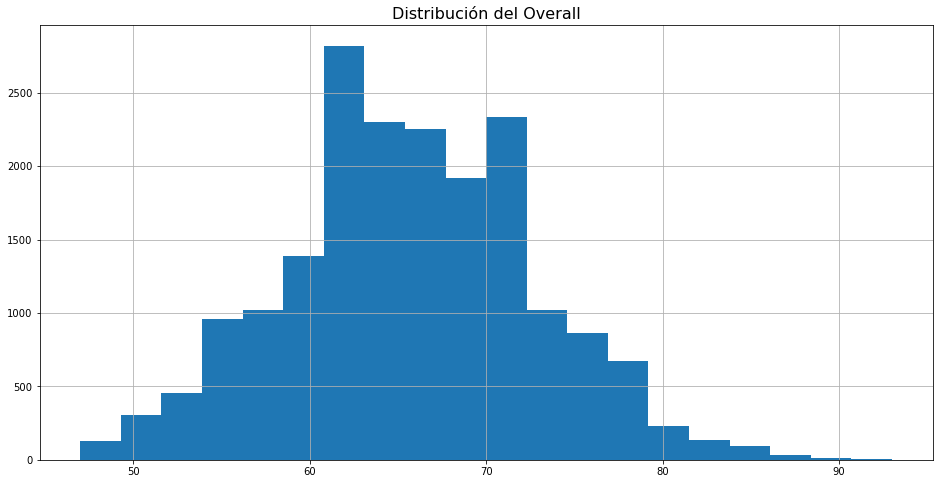

In [10]:
plt.figure(figsize=(16,8))
dataset['overall'].hist(bins = 20)
plt.title('Distribución del Overall', fontsize=16)
plt.show()

Como podemos observar dentro del histograma, la concentración en frecuencia está entre los 60 y 70.

## Nacionalidad de los mejor por posición

Agrupacion por positiones y nacionalidad, ordenados de mayor interes general: 

In [11]:
dataset.iloc[dataset.groupby(dataset['team_position'])['overall'].idxmax()][['team_position','nationality','overall']].sort_values('overall', ascending=False)

,team_position,nationality,overall
0,CAM,Argentina,93
1,LS,Portugal,92
2,GK,Slovenia,91
3,ST,Poland,91
5,RCM,Belgium,91
4,LW,Brazil,91
8,LCB,Netherlands,90
11,RW,Egypt,90
13,SUB,Argentina,89
17,CDM,Brazil,89


Cantidad de Jugadores por Nacionalidad: 

In [12]:
pd.DataFrame(dataset.nationality.value_counts())[:15]

,nationality
England,1685
Germany,1189
Spain,1072
France,984
Argentina,936
Brazil,887
Japan,489
Netherlands,432
Italy,421
United States,378


Clubes con mejor Overall Promedio

In [13]:
dataset.groupby("club_name")["overall"].mean().reset_index().sort_values("overall",ascending=False)[:10]

,club_name,overall
216,FC Bayern München,81.045455
489,Real Madrid,79.250000
131,Chelsea,79.212121
214,FC Barcelona,78.909091
374,Liverpool,78.575758
330,Inter,78.000000
387,Manchester United,77.818182
386,Manchester City,77.484848
339,Juventus,77.483871
612,Tottenham Hotspur,77.242424


Distribución de la edad

In [14]:
dataset.age.value_counts()

23    1473
22    1435
20    1427
24    1423
21    1383
26    1277
28    1274
25    1250
27    1217
29    1045
19    1032
30     935
31     768
18     668
32     628
33     476
34     359
17     273
35     218
36     160
37      81
38      57
16      29
39      28
40      13
41       7
42       5
43       2
53       1
Name: age, dtype: int64

Observamos un caso atípico de un jugador de 53 años, el cual buscamos en el dataset y luego en [wikipedia](https://es.wikipedia.org/wiki/Kazuyoshi_Miura)

In [15]:
dataset[dataset.age==53]

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,league_name,league_rank,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
16065,254704,https://sofifa.com/player/254704/kazuyoshi-miu...,K. Miura,Kazuyoshi Miura,53,1967-02-26,177,72,Japan,Yokohama FC,Japanese J. League Division 1,1.0,59,59,0,850,ST,Right,1,4,2,Low/Low,Normal,No,NaN,NaN,RES,11.0,NaN,2005-07-01,2021.0,NaN,NaN,25.0,63.0,55.0,60.0,19.0,47.0,NaN,NaN,NaN,NaN,NaN,NaN,"Leadership, Team Player",44.0,66.0,56.0,61.0,62.0,63.0,69.0,54.0,36.0,68.0,24.0,26.0,27.0,48.0,62.0,59.0,32.0,21.0,62.0,61.0,45.0,16.0,71.0,66.0,59.0,77.0,NaN,13.0,13.0,6.0,14.0,8.0,6.0,7.0,59+0,59+0,59+0,56+0,60+,60+,60+,56+0,59+0,59+0,59+0,53+2,52+2,52+2,52+2,53+2,33+2,37+2,37+2,37+2,33+2,30+2,32+2,32+2,32+2,30+2


# 2- Evaluación visual e intuitiva de dos variables por vez.



In [16]:
sns.pairplot(dataset)

Error in callback <function flush_figures at 0x000001B2EE859670> (for post_execute):


KeyboardInterrupt: 

# 3- Uso de técnicas de clustering: k-Medias, Mean Shift y Alguna jerárquica (sugerencia: usar 'cityblock' como distancia en el jerárquico).



Clustering-con-Kmeans

In [ ]:
#Preparacion de datos: 

n=10000
df_n=dataset.loc[:n] #los primeros n
df_n=df_n[(df_n['Overall']>70)] # mejores jugadores

skills_ratings = ['Potential', 'International Reputation','Weak Foot',	'Skill Moves','Crossing',	'Finishing',	'HeadingAccuracy',	
                  'ShortPassing',	'Volleys',	'Dribbling',	'Curve',	'FKAccuracy',	'LongPassing',	'BallControl',	'Acceleration',	'SprintSpeed',	
                  'Agility',	'Reactions',	'Balance',	'ShotPower',	'Jumping',	'Stamina',	'Strength',	'LongShots',	'Aggression',	'Interceptions',
                  'Positioning',	'Vision',	'Penalties',	'Composure',	'Marking',	'StandingTackle',	'SlidingTackle',	'GKDiving',	'GKHandling',	'GKKicking',
                  'GKPositioning',	'GKReflexes']

print(len(skills_ratings), 'variables numéricas: skills/habilidades')

df_skills=df_n[skills_ratings]

38 variables numéricas: skills/habilidades


In [ ]:
df_skills[:5]

,Potential,International Reputation,Weak Foot,Skill Moves,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,94,5.0,4.0,4.0,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,94,5.0,4.0,5.0,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,93,5.0,5.0,5.0,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,93,4.0,3.0,1.0,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,92,4.0,5.0,4.0,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


Gráfica **elbow** o de codo para determinar el número óptimo de clústeres. Hacemos una iteración de k-means variando el valor de k, de forma que representamos en el eje x dicho valor de k y en el eje y la suma de los errores cuadráticos (SSE).De esta forma podemos elegir el valor de k dónde se produce el “codo” de la curva

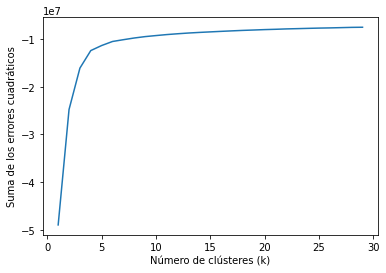

In [ ]:
from sklearn import preprocessing 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

#%% Curva elbow para determinar valor óptimo de k.
nc = range(1, 30) # El número de iteraciones que queremos hacer.

kmeans = [KMeans(n_clusters=i) for i in nc]
score = [kmeans[i].fit(df_skills).score(df_skills) for i in range(len(kmeans))]
score
plt.xlabel('Número de clústeres (k)')
plt.ylabel('Suma de los errores cuadráticos')
plt.plot(nc,score)

La curba nos muestra que un valor de K considerado es 5. 

In [ ]:
bool_crack=df_n["International Reputation"] > 3 #Vamos a usar la clasificacion de  Reputacion Internacional de los jugadores
bool_no_crack=df_n["International Reputation"]<3

skill_1=skills_ratings[13] #BallControl  / Seleccionamos dos caracteristicas para la clasificacion. 
skill_2=skills_ratings[4] #Crossing

kmean_clusters = go.Scatter(x=df_skills[skill_1], y=df_skills[skill_2],
                           mode='markers',
                        text=df_n.loc[:,'Name'],
                           marker=dict(
                                size=7,
                                color = clusters.astype(np.float), 
                                colorscale='Viridis',
                                showscale=False)
                           )

crack =go.Scatter(x=df_skills.loc[bool_crack,skill_1], y=df_skills.loc[bool_crack,skill_2],
                      text=df_n.loc[bool_crack,'Name'],
                      textfont=dict(family='sans serif',size=28,color='black'),
                      opacity=0.5,mode='text')

data=[kmean_clusters,crack]

layout = go.Layout(title="Clustering K means",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1500,height=900)

fig = go.Figure(data=data, layout=layout)
fig.show(renderer="colab")

# Clustering-Mean-Shift

Probaremos varios hiperparametros para obtener la cantidad de Clusters

In [ ]:
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets import make_blobs

bandwidth = estimate_bandwidth(df_skills,n_samples=10000, quantile=0.31)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(df_skills)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

number of estimated clusters : 1


In [ ]:
bandwidth = estimate_bandwidth(df_skills, quantile=0.2, n_samples=500)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(df_skills)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

number of estimated clusters : 1


In [ ]:
ms = MeanShift(bandwidth=None, seeds=None, bin_seeding=False, min_bin_freq=1, cluster_all=True, n_jobs=None, max_iter=300)
ms.fit(df_skills)
labels = ms.labels_
cluster_centers2 = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

number of estimated clusters : 2


In [ ]:
bool_crack=df_n["Overall"] > 85
bool_no_crack=df_n["Overall"]<86

#Eligo dos números entre 0 y  de n_skills-1
skill_1=skills_ratings[16]
skill_2=skills_ratings[18]

data=[]
MeanShift_clusters = go.Scatter(x=df_skills[skill_1], y=df_skills[skill_2],
                           mode='markers',
                        text=df_n.loc[:,'Name'],
                           marker=dict(
                                size=5,
                                color = labels.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )

crack =go.Scatter(x=df_skills.loc[bool_crack,skill_1], y=df_skills.loc[bool_crack,skill_2],name='Top players',
                      text=df_n.loc[bool_crack,'Name'],
                      textfont=dict(family='sans serif',size=20,color='black'),
                      opacity=0.9,mode='text')

data=[MeanShift_clusters,crack]

layout = go.Layout(title="Mean Shift",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
               autosize=False, width=1500,height=900)


fig = go.Figure(data=data, layout=layout)
fig.show(renderer="colab")

# Jerarquia

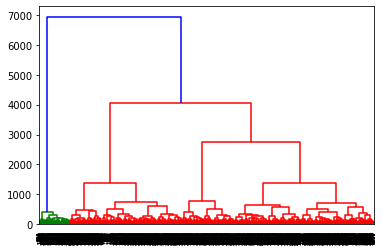

In [ ]:
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(df_skills, method = 'ward')) # Creamos el dendograma para encontrar el número óptimo de clusters
 
plt.show()

In [ ]:
skills_ratings = ['Penalties','Marking']
x=df_skills[skills_ratings]
x[:5]

,Penalties,Marking
0,75.0,33.0
1,85.0,28.0
2,81.0,27.0
3,40.0,15.0
4,79.0,68.0


In [ ]:
# Ajustando Clustering Jerárquico al conjunto de datos

from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, 
                    affinity = 'euclidean',  #No encontre la forma para hacerlo con Cityblock.
                    linkage = 'ward')

y_hc = hc.fit_predict(x)


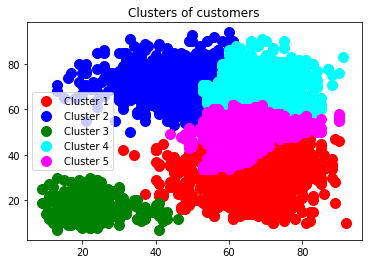

In [ ]:
plt.scatter(x.iloc[y_hc == 0, 0], x.iloc[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(x.iloc[y_hc == 1, 0], x.iloc[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(x.iloc[y_hc == 2, 0], x.iloc[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(x.iloc[y_hc == 3, 0], x.iloc[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(x.iloc[y_hc == 4, 0], x.iloc[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')

plt.title('Clusters of customers')

plt.legend()
plt.show()


# 4- Análisis de los clusters encontrados.



# 5- Embeddings y técnicas de clustering.



In [ ]:
from sklearn import (manifold, preprocessing, decomposition)
import time

time_start = time.time()

tsne = manifold.TSNE(n_components=2, verbose=1,perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(df_skills)

print ('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 4749 samples in 0.000s...
[t-SNE] Computed neighbors for 4749 samples in 0.658s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4749
[t-SNE] Computed conditional probabilities for sample 2000 / 4749
[t-SNE] Computed conditional probabilities for sample 3000 / 4749
[t-SNE] Computed conditional probabilities for sample 4000 / 4749
[t-SNE] Computed conditional probabilities for sample 4749 / 4749
[t-SNE] Mean sigma: 14.706262
[t-SNE] KL divergence after 250 iterations with early exaggeration: 75.455017
[t-SNE] KL divergence after 1000 iterations: 1.853686
t-SNE done! Time elapsed: 40.088380575180054 seconds


In [ ]:
from plotly.offline import init_notebook_mode, plot,iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
import matplotlib.pyplot as plt
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization
import seaborn as sns

data=[]
bool_crack=df_n["International Reputation"] > 3 #diferenciamos a los mejores jugadores

#graficamos los datos en el espacio transformado: las dos componentes tsne

graf1 = go.Scatter(x=X_tsne[:,0], y=X_tsne[:,1],
                           mode='markers',
                        text=df_n.loc[:,'Potential'], #'Height', 'Weight', 'Club', 'Age', 'Name','Position'
                           marker=dict(
                                size=5)
                           )

crack =go.Scatter(x=X_tsne[bool_crack,0], y=X_tsne[bool_crack,1],name='Los  mejores',
                      text=df_n.loc[bool_crack,'Name'],
                      textfont=dict(family='sans serif',size=20,color='black'),
                      opacity=0.9,mode='text')

data=[graf1,crack]

layout = go.Layout(title="Visualización de la base en el espacio tsne, considerando el Potential",titlefont=dict(size=20),
                xaxis=dict(title='componente 1'),
                yaxis=dict(title='componente 2'),
                autosize=False, width=1000,height=700)

fig = go.Figure(data=data, layout=layout)
fig.show(renderer="colab")

En el siguiente gráfico, podemos observar los jugadores sobresalientes segun su **Potential** en cada  clustering segun lo agrupado a traves de **tsne** ya que para un correcto comparativo es necesario contemplar todas las dimensiones. Ésta tecnica nos permites transformarlo a un espacio de dos dimensiones.

# 6- Evaluación.



# 7- Pregunta: ¿Se realizó alguna normalización de la base? ¿Por qué?